In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
#importing the dataset in pandas and looking at the first rows
df = pd.read_csv('all_data.csv')
print(df.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [7]:
#renaming columns in more coding friendly format
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'})
print(df.head())
print(df.year.unique())
standard_deviation = np.std(df.gdp)
print(standard_deviation)

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
5170419813133.932


First and foremost, I would like to show the distribution of both the GDP and the life expectancy across our dataset. In order to do so, we will use the distplot from Seaborn

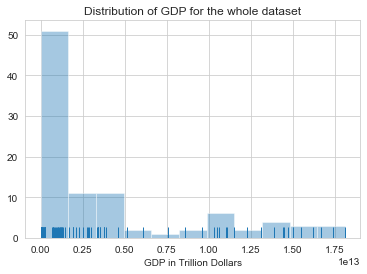

In [24]:
#distribution for GDP
sns.distplot(df.gdp, rug=True, kde=False)
plt.xlabel('GDP in Trillion Dollars')
plt.title('Distribution of GDP for the whole dataset')
plt.show()

The Distribution of GDP is skewed right with most of the values being on the left side of the chart.

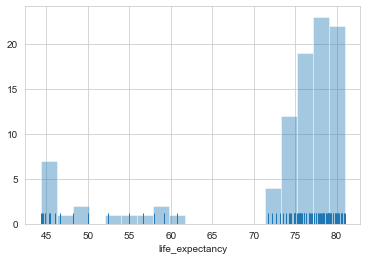

In [25]:
#let's plot the distribution for life expectancy
sns.distplot(df.life_expectancy, rug=True, kde=False)
plt.show()

Here the data is skewed left, meaning that most of the values are on the right handside of the graph. It is worth mentioning that it is almost the opposite as the GDP distribution.

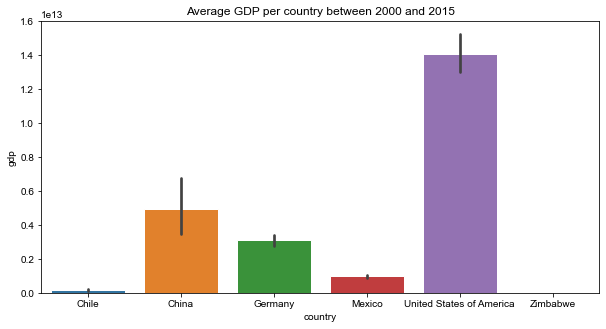

In [8]:
#time to plot the average GDP and average life expectancy over the years per country
#we are going to us seaborn in order to do this

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
sns.barplot(data=df, x='country', y='gdp')
plt.title('Average GDP per country between 2000 and 2015')
plt.show()

As we can see above, the country with the highest average GDP across 2000 to 2015 is the USA followed by China. Zimbabwe and Chile are the countries with the lowest average GDP during this period.

                    country           gdp
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


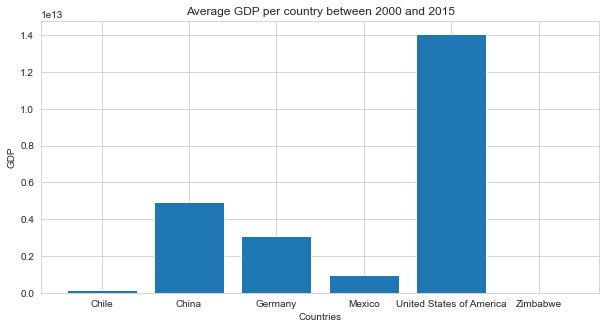

<Figure size 432x288 with 0 Axes>

In [9]:
#the exercise here is to create the same graph but in matplotlib instead with the standard deviation as the error bars
#starting by creating a new dataset
df1 = df.groupby(df['country']).gdp.mean().reset_index()
print(df1)

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df1.country, df1.gdp)
plt.ylabel('GDP')
plt.xlabel('Countries')
plt.title('Average GDP per country between 2000 and 2015')
plt.show()
plt.clf()

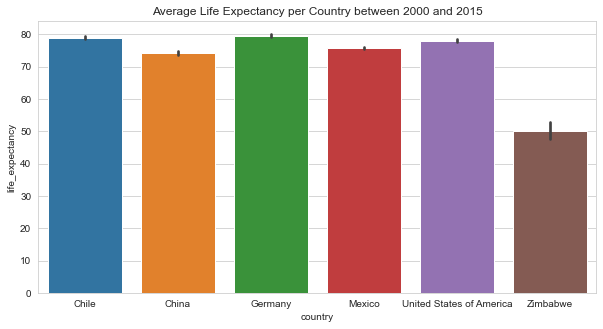

In [10]:
#Doing the same exercise but with life expectancy in order to try finding an early correlation or not
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(data=df, x='country', y='life_expectancy')
plt.title('Average Life Expectancy per Country between 2000 and 2015')
plt.show()

By plotting the average life expectancy per country across 2000 and 2015 we can determine that Germany is slightly in front with an average life expectancy of 80years. Followed by Chile, the US, Mexico, China and Zimb.
We cannot determine any correlation at this stage except maybe that Zimb has got the lowest average GDP and average life expectancy.

It would be interesting then to study how the GDP and life expectancy has evolved per country over the years. We will show this using some bar charts part of the same figure.

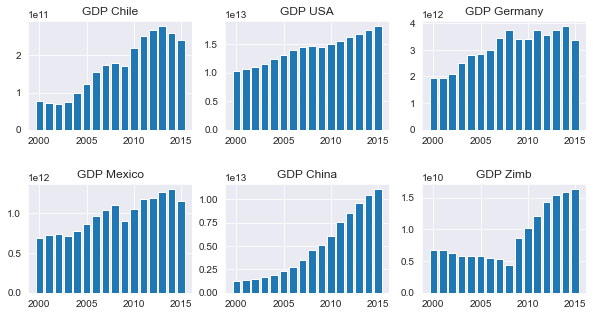

In [11]:
#Goal is to create a bar graph per country showing up all the years
chile = df[df['country'] == 'Chile']
usa = df[df['country'] == 'United States of America']
germany = df[df['country'] == 'Germany']
china = df[df['country'] == 'China']
mexico = df[df['country'] == 'Mexico']
zimb = df[df['country'] == 'Zimbabwe']

fig, axs = plt.subplots(2,3, figsize=(10,5))

axs[0, 0].bar(chile.year, chile.gdp)
axs[0, 0].set_title('GDP Chile')


axs[0, 1].bar(usa.year, usa.gdp)
axs[0, 1].set_title('GDP USA')

axs[0, 2].bar(germany.year, germany.gdp)
axs[0, 2].set_title('GDP Germany')

axs[1, 0].bar(mexico.year, mexico.gdp)
axs[1, 0].set_title('GDP Mexico')

axs[1, 1].bar(china.year, china.gdp)
axs[1, 1].set_title('GDP China')

axs[1, 2].bar(zimb.year, zimb.gdp)
axs[1, 2].set_title('GDP Zimb')

plt.subplots_adjust(hspace=0.5)

plt.show()



From the graphs above, we notice that GDP has increased for all countries between 2000 and 2015. The biggest increase comes from China where GDP has been multiplied by 5 over the years with an exponential growth. Zimbabwe has also seen a sharp increase in its GDP over the years. 
Does it mean that the increase in GDP followed an increase in Life expectancy?
We are going to check that by plotting the bar plots but using FacetGrid instead of subplots.

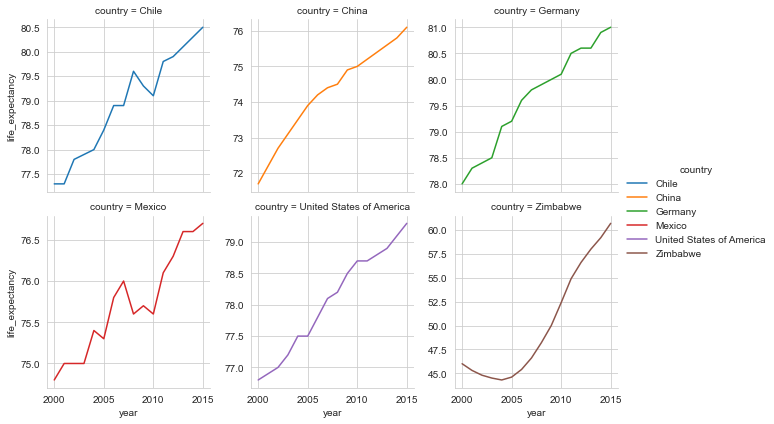

In [34]:
#plotting the life expectancy per country over the years on one Figure using FacetGrid
expectancy_plot = sns.FacetGrid(df, col='country', col_wrap=3, sharey=False, hue='country')

expectancy_plot = (expectancy_plot.map(sns.lineplot, 'year', 'life_expectancy')).add_legend()


Thanks to the FacetGrid functionality in Seaborn, it is much easier to plot the life expectancy per countries over the years. As for the GDP, life expectancy grew over the years with a maximum of 81 years old in Germany in 2015. We can aslo notice that there has been a decrease in Chile and Mexico between 2005 and 2010. As both countries are on the same contined, this might be explained by a pandemic or a war.

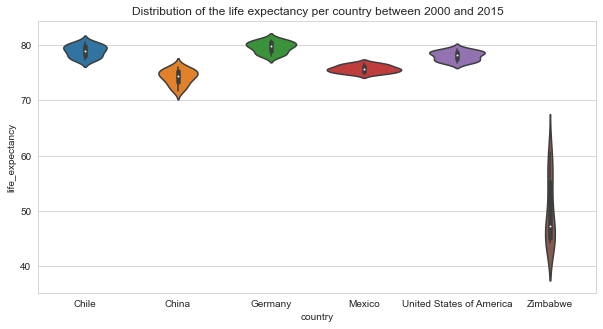

In [17]:
#let's plot our data
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.violinplot(data=df, x=df.country, y=df.life_expectancy)
plt.title('Distribution of the life expectancy per country between 2000 and 2015')
plt.show()

From the violin plots above displaying the distribution of life expectancy per country. We notice that it's in Zimbabwe that we have got the wider range in comparison with the other countries with more compact graphs and less variation in the life expectancy over the years.

We are now going to plot scatter plots in order to work out whether we can establish a correlation between GDP and life expectancy.

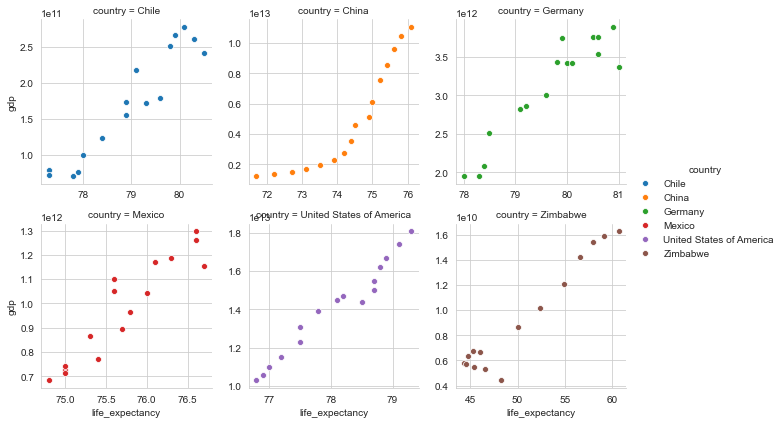

In [44]:
#let's use the same methodology as for our line graphs above
scatter = sns.FacetGrid(df, col='country', hue='country', col_wrap=3, sharey=False, sharex=False)
scatter = (scatter.map(sns.scatterplot, 'life_expectancy', 'gdp')).add_legend()

From the figure above we can conclude that from our dataset it seems there is a correlation between the increase in GDP over the years and the life expectancy in these same countries.

# Conclusion

Through the study of the dataset, and despite differences between countries, we have been able to establish a correlation between GDP and life expectancy. All the countries have seen an increase in their GDP over 15 years and the life expectancy followed. It would be interesting to study the correlation coefficient as well as for 1 point increase in GDP, how does it translate on the life expectancy for all countries and per country.

At the start of the project, we established the following targets of study:

-Has life expectancy increased over time in the six nations?

Life expectancy increase in the six nations over the period. It's Zimbabwe who's got the lowest life expectancy but at the same time it is the country where it increased the most. Germany on the other hand has got the highest life expectancy with 81 years old. We noticed a dip at the same period in Chile and Mexico which could be studied further.

-Has GDP increased over time in the six nations?
Similarly to life expectancy, GDP increased in the 6 nations for all countries. The country with the highest average GDP is the USA. The country which has seen its GDP rocketing is China, with am exponential growth.

-Is there a correlation between GDP and life expectancy of a country?
From a visualization perspective we have been able to establish an overall correlation between GDP and life expectancy. It should be confirmed with some calculation and coefficients though.

-What is the average life expectancy in these nations?
The average life expectancy is plotted on the fifth figure.

-What is the distribution of that life expectancy?
The distribution of the life expectancy for the dataset is skewed left, meaning that most of the datapoints are on the left hand side. The median is then most probably greater than the mean of the dataset.